In [1]:
library(ggplot2)
library(ggthemes)

In [2]:
col_DA = "#2ca02c"
col_Sert = "#98df8a"

In [3]:
mypalette = "Warm and cool"
col_D30 = canva_pal(mypalette)(4)[3]
col_D52 = canva_pal(mypalette)(4)[1]
col_D52_ROT = canva_pal(mypalette)(4)[2]

In [4]:
### day30
nmi_0 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuMat/nmi_neurons_day30.Rds")

In [5]:
### day52 none
nmi_1 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuMat/nmi_neurons_day52_none.Rds")

In [6]:
### day52 rot
nmi_2 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuMat/nmi_neurons_day52_rot.Rds")

In [7]:
# overall: NMI-all, 
# discriminable: NMI-discriminable (based on discrim. modules only ) 
# activity: Neuron Activity Index (NAI, this maybe what in the paper is called NFI; F=functionality)

In [8]:
df_nmi_0 = nmi_0$overallNMI
df_nmi_0$time_point = "Day30"
head(df_nmi_0)

,overall,discriminable,activity,celltype,treatment,time_point
GTCGGGTCATGTCGAT-1-19,0.4728026,0.4439646,0.3068475,Sert,NONE,Day30
ACCAGTATCAAGAAGT-1-33,0.4822061,0.4555255,0.3546429,DA,NONE,Day30
TGGCCAGGTCTCTTTA-1-15,0.4841568,0.4690050,0.3002614,Sert,NONE,Day30
CTCACACCAGATAATG-1-26,0.4822049,0.4329310,0.2910879,Sert,NONE,Day30
CCCTCCTGTCAAGCGA-1-6,0.4931809,0.4764145,0.3114766,Sert,NONE,Day30
CGATGGCAGTGGTAGC-1-20,0.4893730,0.4609344,0.3057609,Sert,NONE,Day30


In [9]:
df_nmi_1 = nmi_1$overallNMI
df_nmi_1$time_point = "Day52"
head(df_nmi_1)

,overall,discriminable,activity,celltype,treatment,time_point
CTTAACTAGACTAAGT-1-20,0.5050777,0.5002210,0.3598966,Sert,NONE,Day52
CCGTACTTCAGGCAAG-1-34,0.4982950,0.4793651,0.3773424,DA,NONE,Day52
CTCGTCACACAGATTC-1-20,0.4702427,0.4406148,0.3208831,DA,NONE,Day52
AGTTGGTTCACTGGGC-1-25,0.5021916,0.4745941,0.3540892,DA,NONE,Day52
CTCTACGAGCGATGAC-1-61,0.5018521,0.4946106,0.3449746,Sert,NONE,Day52
GCAATCATCGATCCCT-1-4,0.4908949,0.4730399,0.3581989,Sert,NONE,Day52


In [10]:
df_nmi_2 = nmi_2$overallNMI
df_nmi_2$time_point = "Day52"
head(df_nmi_2)

,overall,discriminable,activity,celltype,treatment,time_point
CCTACACAGTACGCCC-1-36,0.5001735,0.4829309,0.3858580,DA,ROT,Day52
TAGAGCTCAAGCGAGT-1-58,0.4979538,0.4954870,0.3900825,DA,ROT,Day52
AAGGTTCGTTACGTCA-1-74,0.5027530,0.4807659,0.3643992,DA,ROT,Day52
GGACGTCAGATAGCAT-1-18,0.5210315,0.4954329,0.3618898,Sert,ROT,Day52
TCCCGATAGTATGACA-1-11,0.4941513,0.4724883,0.3298401,Sert,ROT,Day52
ACTATCTGTACAGTTC-1-30,0.5025687,0.4632365,0.3088261,Sert,ROT,Day52


In [11]:
df = rbind(df_nmi_0, df_nmi_1, df_nmi_2)

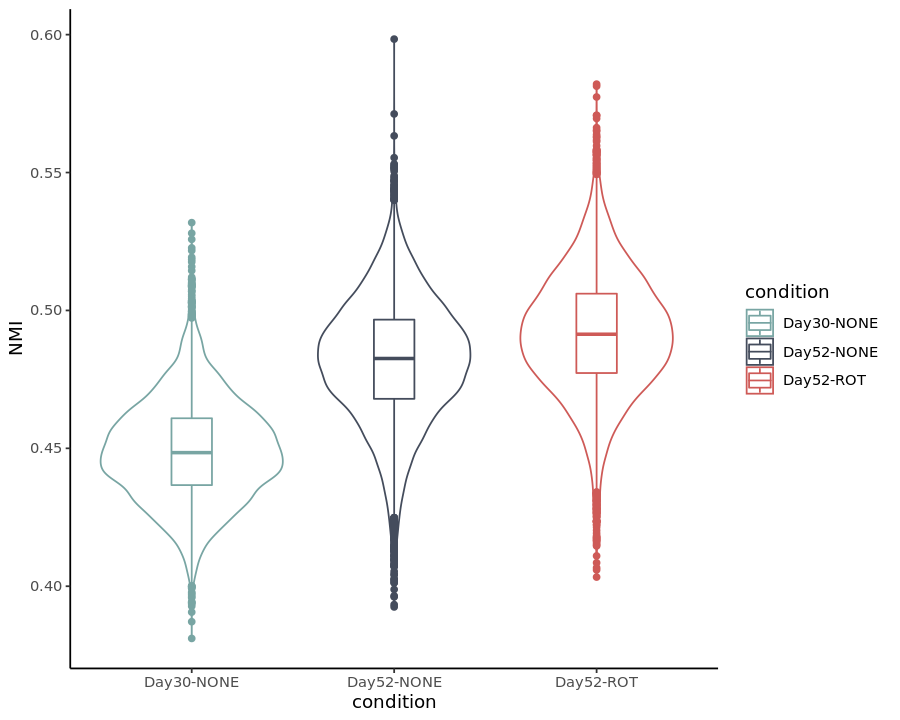

In [17]:
options(repr.plot.width=7.5, repr.plot.height=6)
df$condition = paste0(df$time_point,"-",df$treatment)
ggplot(df, aes(x = condition, y = discriminable, colour = condition)) + geom_violin() + 
        scale_colour_manual(values = c(col_D30, col_D52, col_D52_ROT)) +
        geom_boxplot(width = 0.2) + ylab("NMI") + theme_classic()

In [ ]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"

In [ ]:
pdf(paste0(fig_dir,"SF_8c.pdf"), width=7.5, height=6)
ggplot(df2, aes(x = variable, y = value, colour = variable)) + geom_violin() + geom_boxplot(width = 0.2) + 
    theme_classic() + 
    xlab("") + ylab("Proportion of variance explained") + 
    theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) +
    scale_x_discrete(labels = c("Donor/Line","Pool","Cell type","Treatment","Time point","Residual")) 
dev.off()